# Feature Extraction from Yelp Reviews

In previous analysis we tried pure LDA for topic modeling from Yelp Reviews - even though some of the topics are meaningful, some of them are not. Hence, in this analysis, we are going to use the word embeddings (vectors) as complemntary/post-processing method for LDA.

## Import Required Packages

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read in Data

For this analysis, we are using the MAG ("Mon Ami Gabi") review data from previous analysis. 

This dataset has 7,362 reviews.

In [2]:
MAG_df = pd.read_csv('./data/MAG.csv')
MAG_df.head()

,date,review_id,user_id,stars,text,useful,funny,cool,name
0,2005-10-10,ojCMmtgJPvw6yaIDpUYZmw,qEYG5IE5dTekjIhdoV31bQ,5,If you enjoy a little people watching with you...,0,0,0,"""Mon Ami Gabi"""
1,2005-10-15,diaVB93Is7yYD-ajYQKvqw,k2zuwaAne-FhHd8M6bXnyQ,5,"affordable, fairly classic french food\n\nsit ...",2,2,2,"""Mon Ami Gabi"""
2,2005-12-02,6HswqFO2yndpRGCe2gIAwg,gjhzKWsqCIrpEd9pevbKZw,4,Though heartbroken and a bit aimless on my 22n...,3,2,3,"""Mon Ami Gabi"""
3,2006-01-07,d2IvFpPFBs6trRqVkqyjbg,8-lLoii2bEEB_IDJlryyDw,4,"The food and wine was amazing, but the super h...",1,0,0,"""Mon Ami Gabi"""
4,2006-01-31,M99598wD-2oEQhGru_GvEQ,_W4y7ku6Q0uGoiI3ePtkgQ,5,Yippy! Make-your-own bloody mary bar! Chose t...,0,1,0,"""Mon Ami Gabi"""


At this stage, we are using basic word2vec - so time is not important here.

We just extract the review texts out as the corpus.

In [3]:
MAG_df['text'].head()

0    If you enjoy a little people watching with you...
1    affordable, fairly classic french food\n\nsit ...
2    Though heartbroken and a bit aimless on my 22n...
3    The food and wine was amazing, but the super h...
4    Yippy!  Make-your-own bloody mary bar! Chose t...
Name: text, dtype: object

In [4]:
# Get the review text
MAG_text = MAG_df['text']

In [5]:
import spacy

In [6]:
MAG_text.shape

(7362,)

In [7]:
for i in MAG_text:
    print(i)
    break

If you enjoy a little people watching with your dining, sit out on the outside terrace and watch Las Vegas tourist walk the strip as they celebrate their winnings or rave about the fabulous Bellagio fountains.  As the restaurant is directly across from the fountains, it is also a great place to dine while taking in the free show.   The food fits the setting, with a traditional French menu infused with a bit of Vegas penache.   We had excellent service..polite, prompt, helpful (great at helping us pick a great wine suited to our selections!) and personal.   And by the way,   the wait staff aren't above snapping that great snapshot of you and your guest having a good time....it is great to be a tourist!


In [10]:
#nlp = spacy.load('en_core_web_sm')

In [8]:
from nltk.tokenize import sent_tokenize, TweetTokenizer

In [9]:
tknzr = TweetTokenizer()

In [10]:
sent_tokenize_list = sent_tokenize(i)
print(sent_tokenize_list)

['If you enjoy a little people watching with your dining, sit out on the outside terrace and watch Las Vegas tourist walk the strip as they celebrate their winnings or rave about the fabulous Bellagio fountains.', 'As the restaurant is directly across from the fountains, it is also a great place to dine while taking in the free show.', 'The food fits the setting, with a traditional French menu infused with a bit of Vegas penache.', 'We had excellent service..polite, prompt, helpful (great at helping us pick a great wine suited to our selections!)', 'and personal.', "And by the way,   the wait staff aren't above snapping that great snapshot of you and your guest having a good time....it is great to be a tourist!"]


In [11]:
sent_lst = []
for text in MAG_text:
    sent_tokenize_list = sent_tokenize(text)
    sent_lst.extend(sent_tokenize_list)

In [12]:
len(sent_lst)

65677

In [13]:
sent_lst[100:120]

['One silly thing...they were very flummoxed when I asked for a French Kiss at the bar.',
 'They needed an education!',
 '2 oz.',
 'Vodka\n2 oz.',
 'Chambord\n1 oz.',
 'Creme de Cacao (White or Dark)\n1 oz.',
 'Cream or Half & Half \n\nCombine ingredients in a shaker with ice.',
 'Shake well.',
 'Strain into a chilled martini glass rimmed with sugar.',
 '____________________\nThis one looked good too...lots of variations out there!',
 '- 1 oz vodka  \n- 1 oz raspberry liqueur  \n- 1\\/2 oz orange liqueur (cointreau, grand marnier...)  \n- 1 oz whipping cream  \n\nShake and strain into a champagne flute.',
 'Garnish with a speared cherry or raspberry, and serve.',
 'Overall, a great restaurant!',
 'Not too overpriced- of course price will depend on your hunger, pocket and taste.',
 'This is perhaps the only restaurant that allows you to sit outside & view the beautiful Bellagio Musical Fountain show (every 15 minutes or so), while enjoying fine gourmet French-American cuisine.',
 "I'd g

In [14]:
sentences = []
for s in sent_lst:
    sent = tknzr.tokenize(s)
    #print(sent)
    #break
    sentences.append(sent)

In [15]:
import gensim

In [16]:
from nltk import RegexpTokenizer, PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
stemmer = PorterStemmer()
lemma = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'\w+')
stopwords = stopwords.words('english')

In [19]:
normalized = []
for s in sentences:
    #print(s)
    stop_free = ' '.join([w.lower() for w in s if w.lower() not in stopwords])
    #print(stop_free)
    punc_free = tokenizer.tokenize(stop_free)
    lemmas = [lemma.lemmatize(w) for w in punc_free]
    #print(lemmas)
    stems = [stemmer.stem(w) for w in lemmas]
    num_free = [x for x in stems if not (x.isdigit() or x[0] == '-' and x[1:].isdigit())]
    legit_words = [x for x in num_free if not len(x) < 2]
    #print(stems)
    #break
    normalized.append(legit_words)

In [20]:
normalized[:5]

[['enjoy',
  'littl',
  'peopl',
  'watch',
  'dine',
  'sit',
  'outsid',
  'terrac',
  'watch',
  'la',
  'vega',
  'tourist',
  'walk',
  'strip',
  'celebr',
  'win',
  'rave',
  'fabul',
  'bellagio',
  'fountain'],
 ['restaur',
  'directli',
  'across',
  'fountain',
  'also',
  'great',
  'place',
  'dine',
  'take',
  'free',
  'show'],
 ['food',
  'fit',
  'set',
  'tradit',
  'french',
  'menu',
  'infus',
  'bit',
  'vega',
  'penach'],
 ['excel',
  'servic',
  'polit',
  'prompt',
  'help',
  'great',
  'help',
  'pick',
  'great',
  'wine',
  'suit',
  'select'],
 ['person']]

In [21]:
model = gensim.models.Word2Vec(normalized, sg=1)

In [22]:
print(model.wv['waiter'])

[ 0.12721391  0.19828081  0.2601721   0.03030658  0.17275904 -0.26720273
  0.32707977 -0.37676603  0.13878617 -0.117726   -0.08764648 -0.45906231
 -0.57158864  0.07642916 -0.18423717  0.36018762  0.51553613  0.29242066
  0.04428753 -0.31603244  0.52088952 -0.6492098   0.00992413 -0.27336952
 -0.20943974  0.60658908 -0.01701628  0.06456411  0.54238969  0.2126496
 -0.49751398 -0.0116465  -0.14347765 -0.11283093 -0.31799233 -0.3343688
  0.16316314 -0.05267648  0.3627156   0.16324787 -0.02111661 -0.42256314
  0.55142677 -0.52603084  0.10043303  0.14366421  0.55146676  0.00690864
  0.37463289 -0.08824581  0.01723376  0.03905411  0.32998621 -0.09360901
 -0.36059782  0.16178143 -0.13812497 -0.25889671  0.22116579  0.13665786
 -0.05184035  0.18142983 -0.23852751  0.1361835   0.09711895 -0.46227008
 -0.12267551 -0.21990609 -0.18062687  0.09868263  0.18965776 -0.38342246
 -0.12971507 -0.13552892 -0.14123479  0.50131798 -0.19337109  0.16890176
  0.16504467 -0.02489499  0.3249124  -0.3123256  -0.0

In [23]:
model.wv.most_similar(positive='waiter')

[('server', 0.9254060387611389),
 ('waitress', 0.9137459397315979),
 ('patient', 0.7403699159622192),
 ('smile', 0.729154109954834),
 ('polit', 0.7188321948051453),
 ('busser', 0.717963695526123),
 ('funni', 0.7163062691688538),
 ('busboy', 0.7095843553543091),
 ('assist', 0.7013001441955566),
 ('hostess', 0.700930655002594)]

In [24]:
w = stemmer.stem('service')
model.wv.most_similar(positive=w)

[('staff', 0.7111731767654419),
 ('beyond', 0.7027798891067505),
 ('cleanli', 0.6980612277984619),
 ('job', 0.6965183019638062),
 ('ambienc', 0.6954302191734314),
 ('waitstaff', 0.6913350820541382),
 ('profession', 0.6723306179046631),
 ('valu', 0.6717360615730286),
 ('atmospher', 0.6697717308998108),
 ('spotti', 0.6655088663101196)]

In [25]:
w = stemmer.stem('location')
model.wv.most_similar(positive=w)

[('central', 0.8051056861877441),
 ('conveni', 0.7687088847160339),
 ('hotel', 0.7681535482406616),
 ('asid', 0.767966091632843),
 ('estat', 0.7628470063209534),
 ('gem', 0.760176420211792),
 ('properti', 0.751698911190033),
 ('attract', 0.7465777397155762),
 ('ambienc', 0.7441799640655518),
 ('venu', 0.743647575378418)]

In [26]:
model.wv.most_similar(positive='food')

[('nonetheless', 0.7389082908630371),
 ('cleanli', 0.7079331874847412),
 ('match', 0.6938533782958984),
 ('fair', 0.6882514953613281),
 ('everyth', 0.6874223947525024),
 ('impecc', 0.6869398951530457),
 ('stellar', 0.6785401105880737),
 ('justifi', 0.6744468212127686),
 ('valu', 0.6730986833572388),
 ('importantli', 0.6725000143051147)]

In [28]:
w = stemmer.stem('ambience')
model.wv.most_similar(positive=w, topn=20)

[('atmospher', 0.9286081194877625),
 ('environ', 0.9110881090164185),
 ('ambianc', 0.904298722743988),
 ('sceneri', 0.8720478415489197),
 ('vibe', 0.870358943939209),
 ('venu', 0.8527007102966309),
 ('decor', 0.847709059715271),
 ('cleanli', 0.828788161277771),
 ('stuffi', 0.8183409571647644),
 ('touristi', 0.8091323971748352),
 ('asid', 0.8082122802734375),
 ('charm', 0.8068857192993164),
 ('match', 0.7992700338363647),
 ('european', 0.7985015511512756),
 ('layout', 0.796515166759491),
 ('maintain', 0.7929381132125854),
 ('nonetheless', 0.7925049066543579),
 ('key', 0.7915131449699402),
 ('energi', 0.7895662784576416),
 ('din', 0.7892265915870667)]

In [29]:
w = stemmer.stem('park')
model.wv.most_similar(positive=w)

[('valet', 0.933355987071991),
 ('restroom', 0.9003062844276428),
 ('resort', 0.8839707374572754),
 ('diner', 0.8699828386306763),
 ('distanc', 0.8699555397033691),
 ('access', 0.8698467016220093),
 ('balli', 0.8693110942840576),
 ('entranc', 0.8679239749908447),
 ('nearbi', 0.8656187057495117),
 ('mile', 0.8653756976127625)]

In [30]:
w = stemmer.stem('discount')
model.wv.most_similar(positive=w)

[('shout', 0.9472251534461975),
 ('orient', 0.9465384483337402),
 ('program', 0.9452970623970032),
 ('joel', 0.9442019462585449),
 ('accordingli', 0.9427570700645447),
 ('exhaust', 0.9417861104011536),
 ('se', 0.9405542016029358),
 ('diseas', 0.9396520256996155),
 ('offens', 0.9386388659477234),
 ('fee', 0.9379760026931763)]

In [31]:
w = stemmer.stem('deal')
model.wv.most_similar(positive=w)

[('ridicul', 0.8163323402404785),
 ('restur', 0.7985297441482544),
 ('aren', 0.7980721592903137),
 ('shockingli', 0.7914962768554688),
 ('bargain', 0.7850931882858276),
 ('spendi', 0.7831984758377075),
 ('steep', 0.7815159559249878),
 ('touristi', 0.7809658646583557),
 ('pleaser', 0.7776483297348022),
 ('bang', 0.7760417461395264)]

In [33]:
model.wv.similarity(w1='waiter', w2='servic')

0.43750815813173199

In [34]:
model.wv.similarity(w1='steak', w2='frite')

0.67247590403113577

In [35]:
model1 = gensim.models.Word2Vec(normalized, sg=0)

In [44]:
model1.wv.most_similar(positive='waiter')

[('server', 0.9729961156845093),
 ('waitress', 0.951896071434021),
 ('help', 0.8089528679847717),
 ('attent', 0.7889964580535889),
 ('name', 0.7662813663482666),
 ('attitud', 0.7634255886077881),
 ('polit', 0.7611757516860962),
 ('smile', 0.7547782063484192),
 ('question', 0.7508223652839661),
 ('friendli', 0.7474815845489502)]

In [45]:
#model.wv.most_similar(positive='waiter', negative='busboy', postive = 'waitress')

In [46]:
w = stemmer.stem('location')
model1.wv.most_similar(positive=w)

[('ambianc', 0.8307332992553711),
 ('strip', 0.8291972875595093),
 ('atmospher', 0.8131299614906311),
 ('ambienc', 0.8087866902351379),
 ('boulevard', 0.8005684614181519),
 ('central', 0.7937352657318115),
 ('blvd', 0.7936339378356934),
 ('tourist', 0.7862308025360107),
 ('restaur', 0.7805492877960205),
 ('spot', 0.77568119764328)]

In [41]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

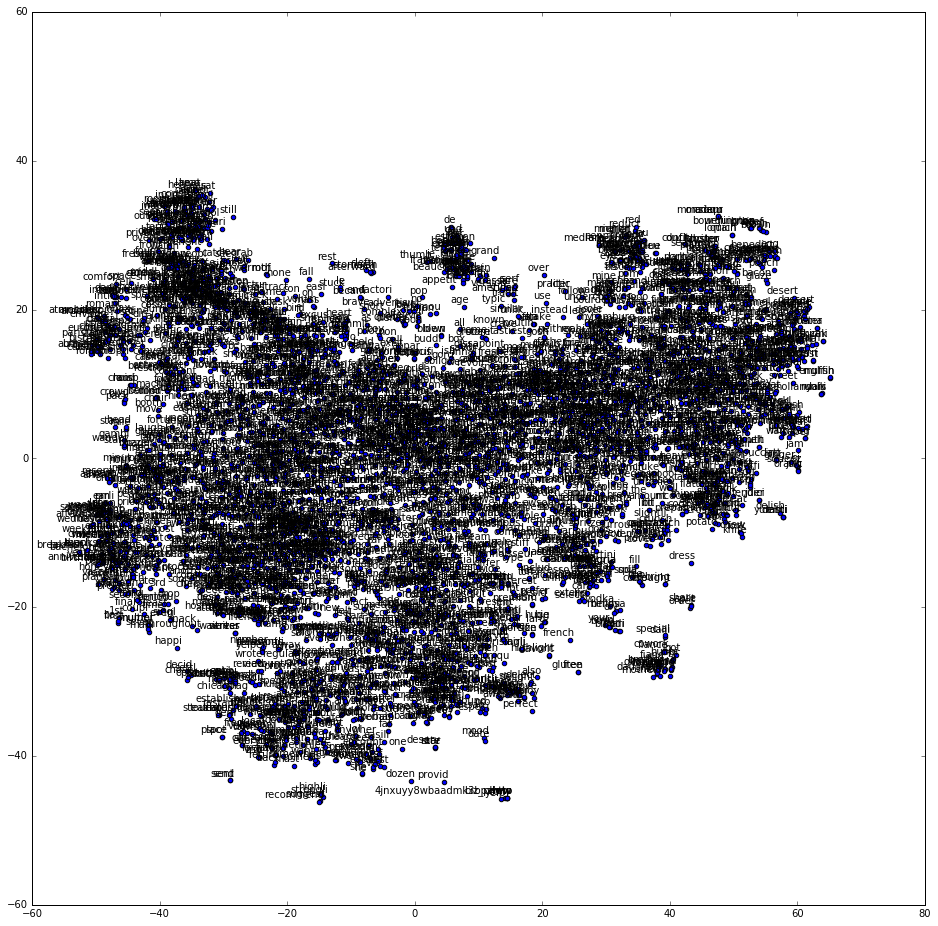

In [43]:
tsne_plot(model)

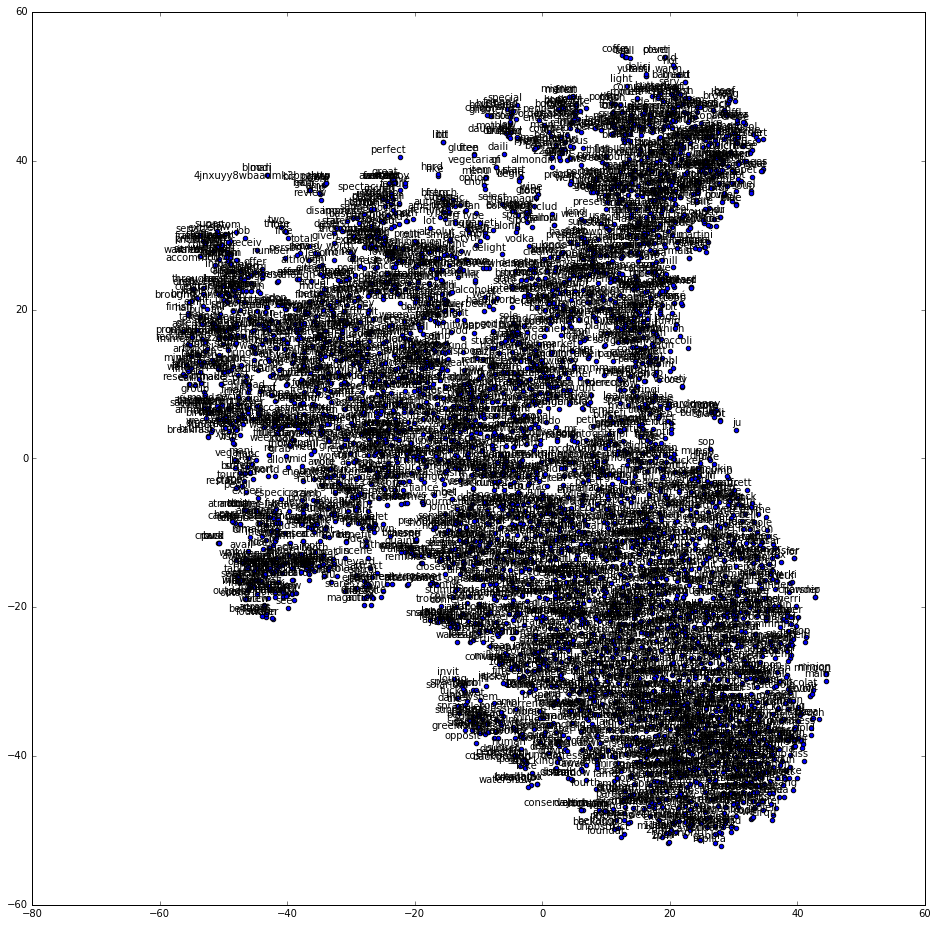

In [47]:
tsne_plot(model1)

In [48]:
type(model.wv.vocab)

dict

In [49]:
model.wv.vocab['food']

In [50]:
word_lst = [w for sublist in normalized for w in sublist]
word_lst[:5]

['enjoy', 'littl', 'peopl', 'watch', 'dine']

In [79]:
freq_word_lst = []
for i in range(0,1000):
    word = model1.wv.index2word[i]
    freq_word_lst.append(word)

In [80]:
freq_word_lst

['food',
 'good',
 'great',
 'steak',
 'place',
 'order',
 'servic',
 'vega',
 'time',
 'french',
 'restaur',
 'like',
 'get',
 'patio',
 'seat',
 'one',
 'view',
 'bellagio',
 'go',
 'love',
 'realli',
 'would',
 'delici',
 'wait',
 'tabl',
 'nice',
 'fountain',
 'dinner',
 'it',
 'also',
 'strip',
 'tri',
 'outsid',
 'come',
 'reserv',
 'came',
 'ami',
 'mon',
 'back',
 'bread',
 'breakfast',
 'got',
 'best',
 'meal',
 'gabi',
 'well',
 'even',
 'price',
 'sit',
 'eat',
 'amaz',
 'frite',
 'perfect',
 'enjoy',
 'make',
 've',
 'sauc',
 'peopl',
 'soup',
 'egg',
 'want',
 'definit',
 'recommend',
 'chees',
 'onion',
 'right',
 'made',
 'menu',
 'fri',
 'server',
 'experi',
 'wine',
 'watch',
 'show',
 'littl',
 'didn',
 'friend',
 'salad',
 'alway',
 'serv',
 'lunch',
 'brunch',
 'tast',
 'pretti',
 'first',
 'excel',
 'day',
 'dish',
 'insid',
 'went',
 'butter',
 'much',
 'look',
 'dine',
 'ask',
 'don',
 'star',
 'cook',
 'could',
 'night',
 'water',
 'crepe',
 'waiter',
 'side',
 

In [81]:
my_vocab = {k:model1.wv.vocab[k] for k in freq_word_lst if k in model1.wv.vocab}

In [82]:
def tsne_plot_freq(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in my_vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=9)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

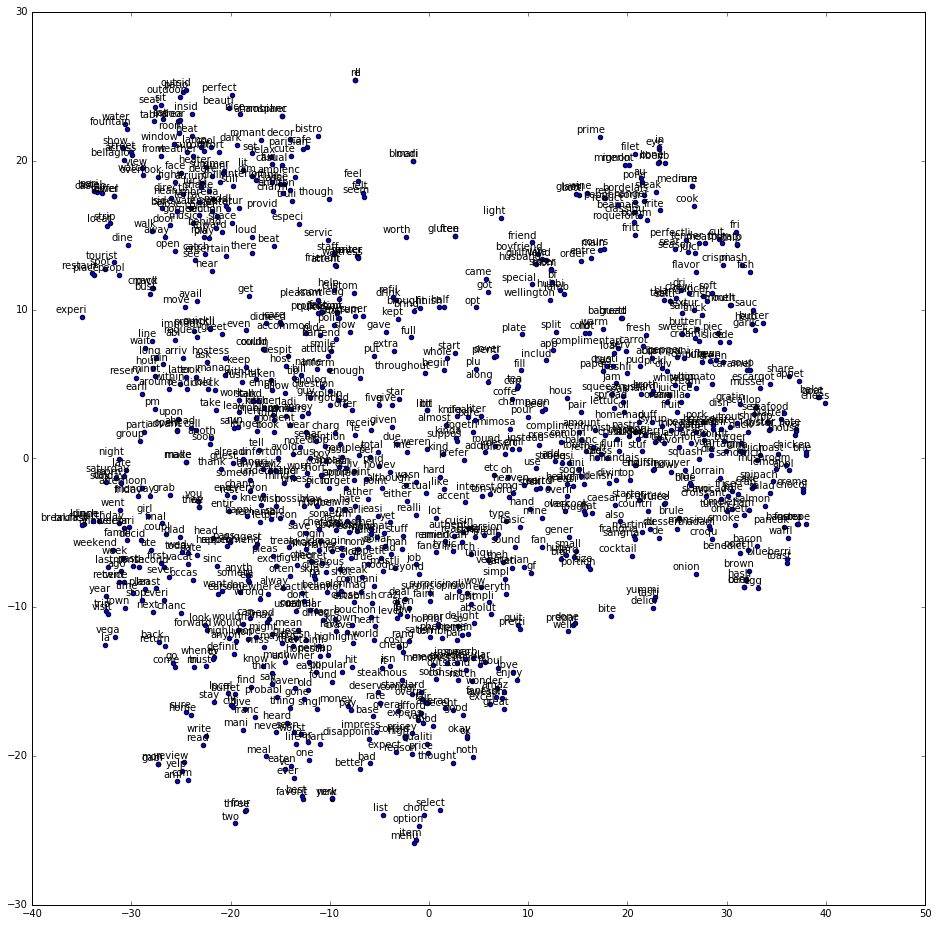

In [83]:
tsne_plot_freq(model1)

Using the 500 most frequent words in the reviews, and map them to a 2-dimensional space, it is somewhat clear that the top-left part is about the **food**, the top-right part is about the **location**, and lower-center part is about **service/business**.

Also, you can observe some sentiment signals, such as 'top', 'well', 'love', 'perfect' and 'delicious' locate in the intersection(s) of the three parts.

In [67]:
most_freq_word = []
for i in range(0,500):
    word = model.wv.index2word[i]
    most_freq_word.append(word)

In [68]:
my_vocab = {k:model.wv.vocab[k] for k in most_freq_word if k in model.wv.vocab}

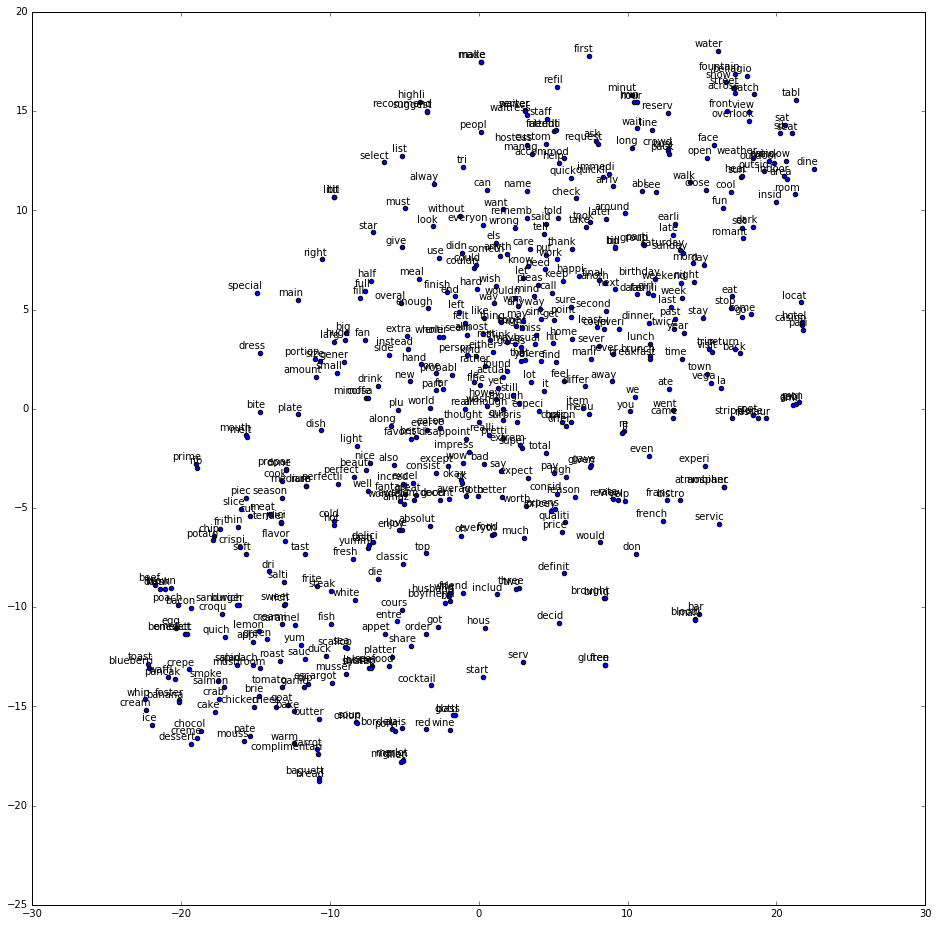

In [69]:
tsne_plot_freq(model)

So from above visualizations you can see that the terms are somewhat separated (so the latent topics could be cluster of words) - so based on the suggestion of five dimensions ('food', 'service', 'ambience', 'deals', and 'worhtiness'), I did some exploratory analysis. I think the results below can be used to identify (latent) topics. 

In [65]:
w = stemmer.stem('price')
model1.wv.most_similar(positive=w)

[('expens', 0.8132734894752502),
 ('qualiti', 0.7984447479248047),
 ('valu', 0.7965025901794434),
 ('overpr', 0.7639353275299072),
 ('afford', 0.75302654504776),
 ('pricey', 0.7240631580352783),
 ('cheap', 0.7172661423683167),
 ('consid', 0.7105605602264404),
 ('cost', 0.7074029445648193),
 ('rang', 0.6815131902694702)]

In [66]:
w = stemmer.stem('restaurant')
model1.wv.most_similar(positive=w)

[('place', 0.833743691444397),
 ('tourist', 0.8106674551963806),
 ('locat', 0.7805492877960205),
 ('steakhous', 0.7684863805770874),
 ('trap', 0.7620304822921753),
 ('pari', 0.7548383474349976),
 ('casino', 0.7537254095077515),
 ('chicago', 0.7408798336982727),
 ('eateri', 0.7408641576766968),
 ('citi', 0.7324322462081909)]

In [85]:
w1 = stemmer.stem('ambience')
w2 = stemmer.stem('location')
model1.wv.most_similar(positive=w1)#, negative=w2)

[('ambianc', 0.9674095511436462),
 ('atmospher', 0.9594449400901794),
 ('environ', 0.9471005797386169),
 ('vibe', 0.9143185615539551),
 ('decor', 0.8950786590576172),
 ('sceneri', 0.8794181942939758),
 ('charm', 0.871074378490448),
 ('classi', 0.8697537183761597),
 ('truli', 0.8448331356048584),
 ('central', 0.833415687084198)]

In [91]:
model1.wv.most_similar(positive=w2)

[('ambianc', 0.8307332992553711),
 ('strip', 0.8291972875595093),
 ('atmospher', 0.8131299614906311),
 ('ambienc', 0.8087866902351379),
 ('boulevard', 0.8005684614181519),
 ('central', 0.7937352657318115),
 ('blvd', 0.7936339378356934),
 ('tourist', 0.7862308025360107),
 ('restaur', 0.7805492877960205),
 ('spot', 0.77568119764328)]

In [92]:
w = stemmer.stem('business')
model1.wv.most_similar(positive=w)

[('pack', 0.9293253421783447),
 ('crowd', 0.9222991466522217),
 ('crazi', 0.8123741149902344),
 ('despit', 0.8062793612480164),
 ('loud', 0.8016042709350586),
 ('line', 0.769432783126831),
 ('there', 0.7691255807876587),
 ('due', 0.759738564491272),
 ('host', 0.7508124113082886),
 ('noon', 0.7497431635856628)]

In [93]:
w = stemmer.stem('wait')
model1.wv.most_similar(positive=w)

[('line', 0.8214706182479858),
 ('hour', 0.8024260401725769),
 ('min', 0.7997686266899109),
 ('longer', 0.7926262021064758),
 ('long', 0.7922327518463135),
 ('stand', 0.7884407043457031),
 ('problem', 0.7548599243164062),
 ('readi', 0.7531698346138),
 ('within', 0.7496975660324097),
 ('rush', 0.7401233315467834)]

In [94]:
w = stemmer.stem('value')
model1.wv.most_similar(positive=w)

[('expens', 0.9241329431533813),
 ('afford', 0.9238401651382446),
 ('overpr', 0.922265350818634),
 ('fair', 0.8968185782432556),
 ('qualiti', 0.8949495553970337),
 ('consid', 0.8608591556549072),
 ('compar', 0.8563376069068909),
 ('level', 0.8536601662635803),
 ('cheap', 0.8494590520858765),
 ('term', 0.8476232290267944)]

In [95]:
w = stemmer.stem('worth')
model1.wv.most_similar(positive=w)

[('pay', 0.7158501744270325),
 ('cannot', 0.7130535840988159),
 ('can', 0.708437442779541),
 ('cheap', 0.694197416305542),
 ('alon', 0.6872305870056152),
 ('especi', 0.679923415184021),
 ('hope', 0.6624035239219666),
 ('money', 0.6610572338104248),
 ('pricey', 0.6502284407615662),
 ('consid', 0.6429672837257385)]

In [97]:
w = stemmer.stem('service')
model1.wv.most_similar(positive=w)

[('staff', 0.7904011011123657),
 ('job', 0.7582511901855469),
 ('ambienc', 0.7518764138221741),
 ('environ', 0.7491909265518188),
 ('atmospher', 0.732141375541687),
 ('valu', 0.7067434787750244),
 ('waitstaff', 0.6999078989028931),
 ('ambianc', 0.6983109712600708),
 ('custom', 0.6927196383476257),
 ('prompt', 0.6765928268432617)]

In [102]:
#w = stemmer.stem('atmospher')
model1.wv.most_similar(positive='atmospher')

[('ambianc', 0.9836938977241516),
 ('ambienc', 0.959445059299469),
 ('vibe', 0.9015240669250488),
 ('decor', 0.8999812006950378),
 ('environ', 0.8882426023483276),
 ('classi', 0.8340445756912231),
 ('relax', 0.822429358959198),
 ('casual', 0.8155412673950195),
 ('locat', 0.8131300210952759),
 ('charm', 0.8125052452087402)]

In [106]:
model1.wv.most_similar(positive='staff', topn=40)

[('attent', 0.883885383605957),
 ('friendli', 0.8754956722259521),
 ('profession', 0.8371435403823853),
 ('waitstaff', 0.8365179896354675),
 ('effici', 0.828899621963501),
 ('prompt', 0.8284736275672913),
 ('bartend', 0.8226366639137268),
 ('server', 0.8171480298042297),
 ('fast', 0.8148822784423828),
 ('patient', 0.8112978935241699),
 ('polit', 0.7923811674118042),
 ('servic', 0.7904011011123657),
 ('help', 0.7900453209877014),
 ('attitud', 0.7835376858711243),
 ('rude', 0.7654735445976257),
 ('job', 0.7648391723632812),
 ('custom', 0.7635065317153931),
 ('waitress', 0.7619985938072205),
 ('courteou', 0.753203272819519),
 ('hostess', 0.7505384683609009),
 ('quick', 0.7504300475120544),
 ('smile', 0.7480350136756897),
 ('waiter', 0.7453262209892273),
 ('despit', 0.7288166880607605),
 ('knowledg', 0.7253719568252563),
 ('pleasant', 0.721368134021759),
 ('host', 0.7186971306800842),
 ('extrem', 0.7180296182632446),
 ('detail', 0.7168587446212769),
 ('scott', 0.7138160467147827),
 ('desk'

In [108]:
model1.wv.most_similar(positive='valu', topn=40)

[('expens', 0.9241329431533813),
 ('afford', 0.9238401651382446),
 ('overpr', 0.922265350818634),
 ('fair', 0.8968185782432556),
 ('qualiti', 0.8949495553970337),
 ('consid', 0.8608591556549072),
 ('compar', 0.8563376069068909),
 ('level', 0.8536601662635803),
 ('cheap', 0.8494590520858765),
 ('term', 0.8476232290267944),
 ('standard', 0.8462693095207214),
 ('higher', 0.8434086441993713),
 ('moder', 0.838331401348114),
 ('isn', 0.8340737819671631),
 ('rang', 0.8275974988937378),
 ('cost', 0.824525773525238),
 ('solid', 0.8215476870536804),
 ('mediocr', 0.8120601773262024),
 ('steep', 0.8027927875518799),
 ('memor', 0.8026753664016724),
 ('high', 0.7989445924758911),
 ('price', 0.7965025305747986),
 ('averag', 0.7933739423751831),
 ('justifi', 0.793303370475769),
 ('overal', 0.792961061000824),
 ('par', 0.7927165627479553),
 ('asid', 0.7924433946609497),
 ('deal', 0.7881677150726318),
 ('rel', 0.7848997712135315),
 ('lower', 0.7842766046524048),
 ('aren', 0.7836260795593262),
 ('outrag'

In [110]:
model1.wv.most_similar(positive='price', topn=40)

[('expens', 0.8132734894752502),
 ('qualiti', 0.7984447479248047),
 ('valu', 0.7965025901794434),
 ('overpr', 0.7639353275299072),
 ('afford', 0.75302654504776),
 ('pricey', 0.7240631580352783),
 ('cheap', 0.7172661423683167),
 ('consid', 0.7105605602264404),
 ('cost', 0.7074029445648193),
 ('rang', 0.6815131902694702),
 ('standard', 0.6812376379966736),
 ('compar', 0.677761435508728),
 ('high', 0.6671467423439026),
 ('level', 0.664540708065033),
 ('fair', 0.6634502410888672),
 ('isn', 0.6633458137512207),
 ('higher', 0.6599114537239075),
 ('money', 0.6514567136764526),
 ('term', 0.6436513662338257),
 ('averag', 0.6375682353973389),
 ('rel', 0.6332738399505615),
 ('deal', 0.6328272223472595),
 ('inexpens', 0.6308079957962036),
 ('shockingli', 0.6252551674842834),
 ('low', 0.6232759356498718),
 ('environ', 0.6211010217666626),
 ('rate', 0.6181138157844543),
 ('steakhous', 0.6162930727005005),
 ('mediocr', 0.6162303686141968),
 ('moder', 0.6132554411888123),
 ('solid', 0.6082821488380432

In [112]:
model1.wv.most_similar(positive=stemmer.stem('customer'), topn=40)

[('improv', 0.8788447976112366),
 ('poor', 0.8748594522476196),
 ('profession', 0.8583831787109375),
 ('impecc', 0.8457242250442505),
 ('job', 0.8440914750099182),
 ('prompt', 0.842320442199707),
 ('terribl', 0.8306328058242798),
 ('effici', 0.8197942972183228),
 ('courteou', 0.8190151453018188),
 ('friendli', 0.814610481262207),
 ('attent', 0.8113818764686584),
 ('detail', 0.8095049858093262),
 ('tag', 0.8062861561775208),
 ('snooti', 0.8032553195953369),
 ('waitstaff', 0.7998799085617065),
 ('slow', 0.7995535135269165),
 ('environ', 0.7966855764389038),
 ('pleasant', 0.796501636505127),
 ('horribl', 0.7942214012145996),
 ('train', 0.79193115234375),
 ('polit', 0.7896690964698792),
 ('compet', 0.7881300449371338),
 ('low', 0.7871875762939453),
 ('hospit', 0.7852172255516052),
 ('unaccept', 0.7806390523910522),
 ('level', 0.7796686291694641),
 ('match', 0.775195300579071),
 ('classi', 0.7681145071983337),
 ('except', 0.7668060064315796),
 ('knowledg', 0.7667611837387085),
 ('fact', 0.7

In [113]:
model1.wv.most_similar(positive=stemmer.stem('service'), topn=40)

[('staff', 0.7904011011123657),
 ('job', 0.7582511901855469),
 ('ambienc', 0.7518764138221741),
 ('environ', 0.7491909265518188),
 ('atmospher', 0.732141375541687),
 ('valu', 0.7067434787750244),
 ('waitstaff', 0.6999078989028931),
 ('ambianc', 0.6983109712600708),
 ('custom', 0.6927196383476257),
 ('prompt', 0.6765928268432617),
 ('profession', 0.6739245057106018),
 ('friendli', 0.6738024950027466),
 ('food', 0.6704187989234924),
 ('attent', 0.6647455096244812),
 ('beyond', 0.6593096256256104),
 ('impecc', 0.6557207107543945),
 ('effici', 0.6520535349845886),
 ('experi', 0.6506155729293823),
 ('deal', 0.64799964427948),
 ('match', 0.6421831846237183),
 ('pleasant', 0.6417486071586609),
 ('sceneri', 0.6410365104675293),
 ('so', 0.6374205350875854),
 ('notch', 0.6373942494392395),
 ('exemplari', 0.6356998682022095),
 ('improv', 0.6310486793518066),
 ('detail', 0.6286574006080627),
 ('qualiti', 0.6204113960266113),
 ('cleanli', 0.6174392700195312),
 ('level', 0.6151856184005737),
 ('fast